Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = "yuke li"
COLLABORATORS = ""

---


# Problem description

To a large degree, financial data has traditionally been numeric in format.

But in recent years, non-numeric formats like image, text and audio have been introduced.  

Private companies have satellites orbiting the Earth taking photos and offering them to customers.  A financial analyst might be able to extract information from these photos that could aid in the prediction of the future price of a stock

- Approximate number of customers visiting each store: count number of cars in parking lot
- Approximate activity in a factory by counting number of supplier trucks arriving and number of delivery trucks leaving
- Approximate demand for a commodity at each location: count cargo ships traveling between ports

In this assignment, we will attempt to recognize ships in satellite photos.
This would be a first step toward
counting.

As in any other domain: specific knowledge of the problem area will make you a better analyst.
For this assignment, we will ignore domain-specific information and just try to use a labeled training set (photo plus a binary indicator for whether a ship is present/absent in the photo), assuming that the labels are perfect.



## Goal: 

In this notebook, you will need to create a model in `sklearn` to classify satellite photos.
- The features are images: 3 dimensional collection of pixels
  - 2 spatial dimensions
  - 1 dimension with 3 features for different parts of the color spectrum: Red, Green, Blue
- The labels are either 1 (ship is present) or 0 (ship is not present)


## Learning objectives
- Learn how to implement a model to solve a Classification task


# Imports modules

In [2]:
## Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sklearn

import os
import math

%matplotlib inline

In [3]:
## Load the helper module
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Reload all modules imported with %aimport
%reload_ext autoreload
%autoreload 1

# Import nn_helper module
import helper
%aimport helper

helper = helper.Helper()

# API for students

We have defined some utility routines in a file `helper.py`. There is a class named `Helper` in it.  

This will simplify problem solving

More importantly: it adds structure to your submission so that it may be easily graded

`helper = helper.Helper()`

- getData: Get a collection of labeled images, used as follows

  >`data, labels = helper.getData()`
- showData: Visualize labelled images, used as follows

  >`helper.showData(data, labels)`
- model_interpretation: Visualize the model parameters
  
  >`helper.model_interpretation(Classifier)`

# Get the data

The first step in our Recipe is Get the Data.

We have provided a utility method `getData` to simplify this for you

In [4]:
# Get the data
data, labels = helper.getData()
n_samples, width, height, channel = data.shape

print("Data shape: ", data.shape)
print("Labels shape: ", labels.shape)
print("Label values: ", np.unique(labels))


Data shape:  (4000, 80, 80, 3)
Labels shape:  (4000,)
Label values:  [0 1]


Your expected outputs should be following      
`Date shape: (4000, 80, 80, 3)`           
`Labels shape: (4000,)`       
`Label values: [0 1]`        

We will shuffle the examples before doing anything else.

This is usually a good idea
- Many datasets are naturally arranged in a *non-random* order, e.g., examples with the sample label grouped together
- You want to make sure that, when you split the examples into training and test examples, each split has a similar distribution of examples

In [5]:
# Shuffle the data first
data, labels = sklearn.utils.shuffle(data, labels, random_state=42)

## Have a look at the data

We will not go through all steps in the Recipe, nor in depth.

But here's a peek

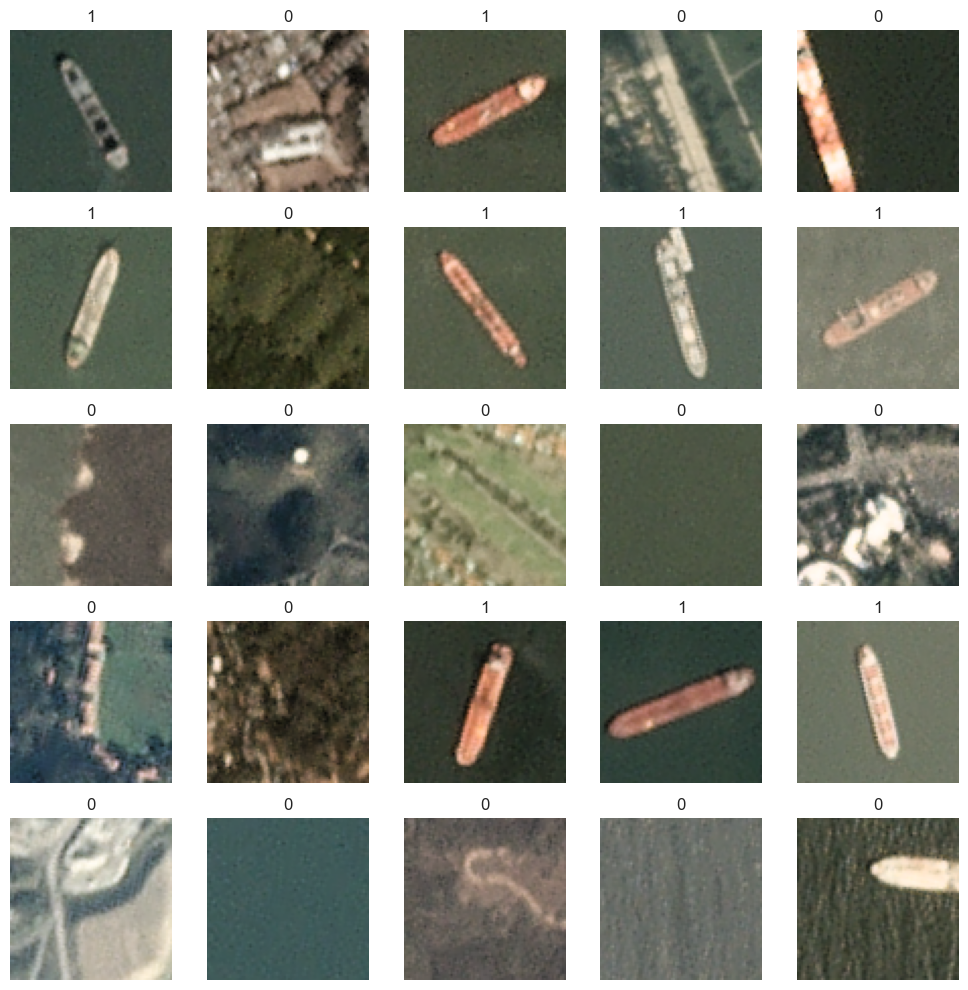

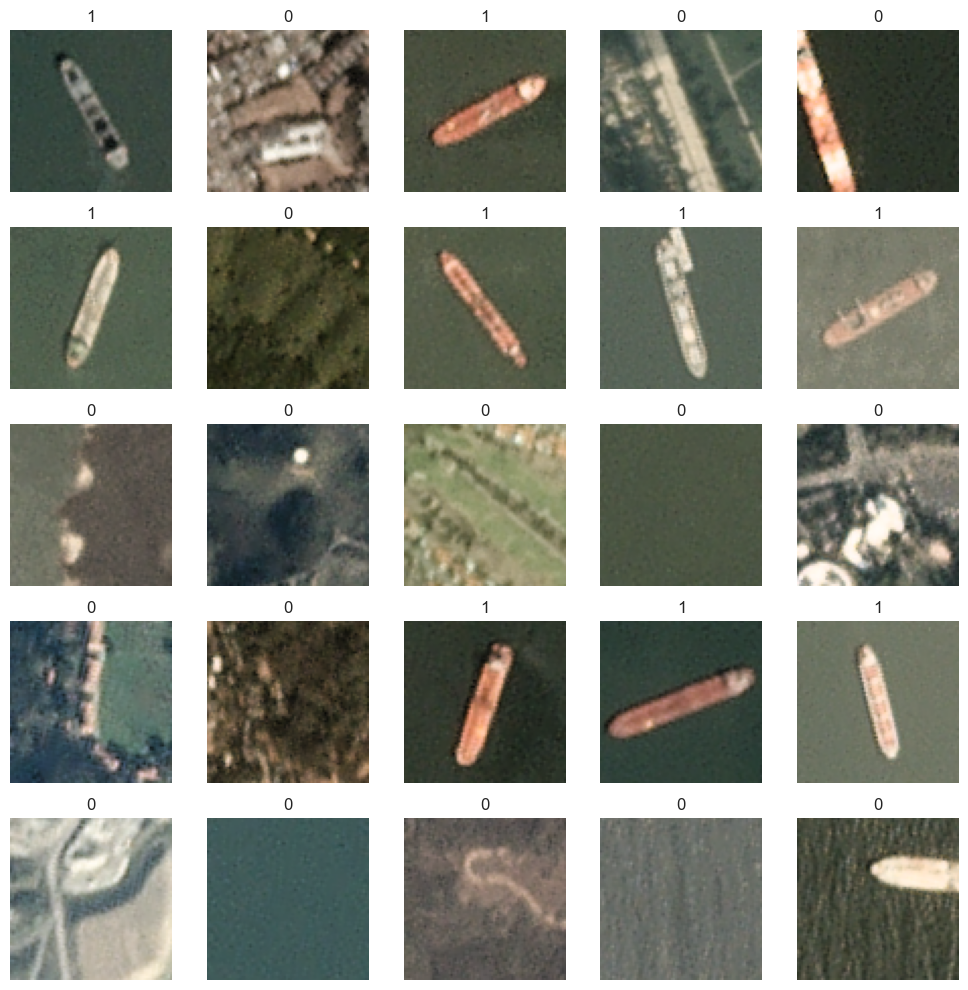

In [6]:
# Visualize the data samples
helper.showData(data[:25], labels[:25])

## Eliminate the color dimension

As a simplification, we will convert the image from color (RGB, with 3 "color" dimensions referred to as Red, Green and Blue) to gray scale.


In [7]:
print("Original shape of data: ", data.shape)

w = (.299, .587, .114)
data_bw = np.sum(data *w, axis=3)

print("New shape of data: ", data_bw.shape)

Original shape of data:  (4000, 80, 80, 3)
New shape of data:  (4000, 80, 80)


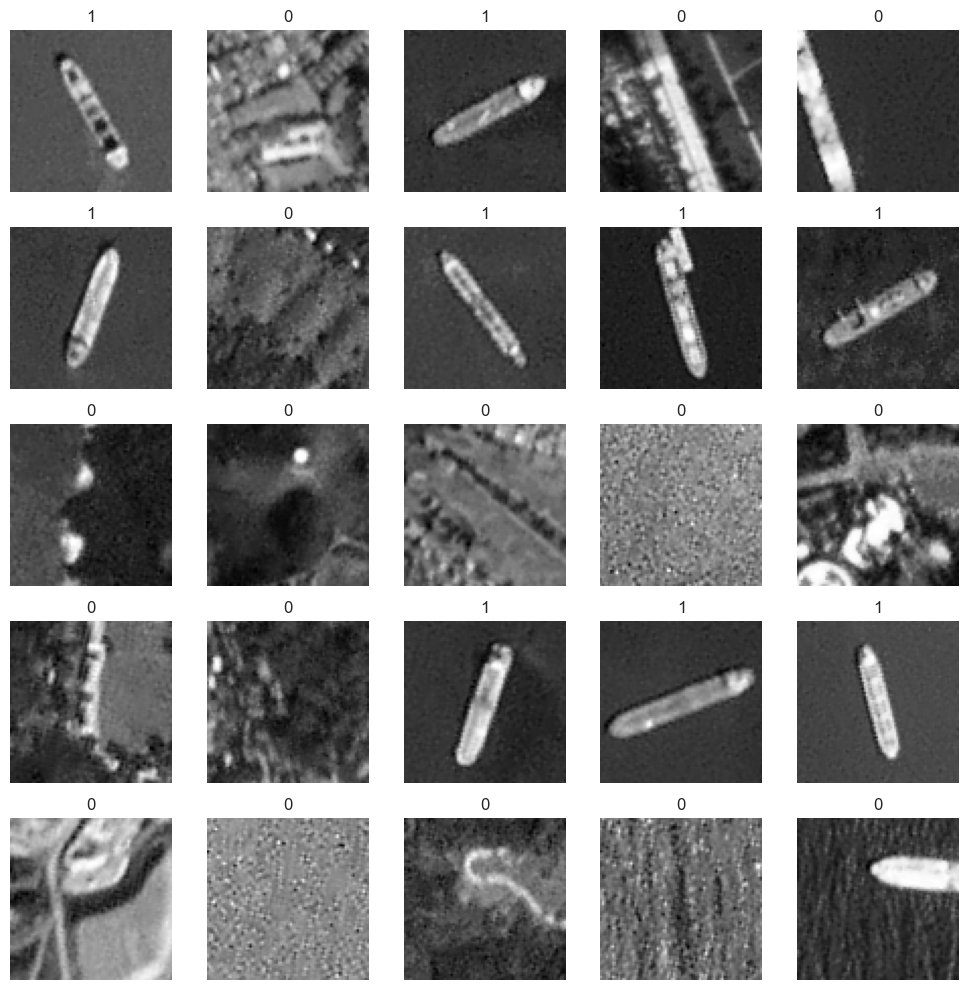

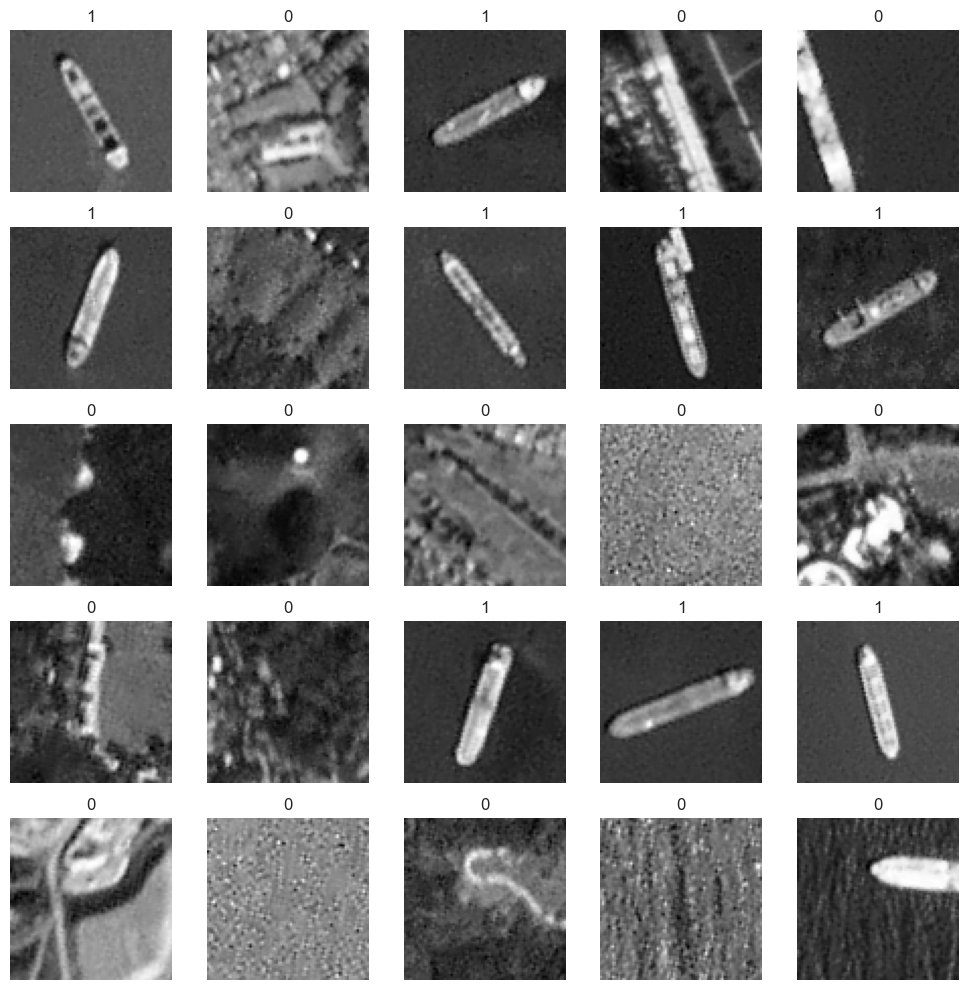

In [8]:
# Visualize the data samples
helper.showData(data_bw[:25], labels[:25], cmap="gray")

## Have  look at the data: Examine the image/label pairs

Rather than viewing the examples in random order, let's group them by label.

Perhaps we will learn something about the characteristics of images that contain ships.

We have loaded and shuffled our dataset, now we will take a look at image/label pairs. 

Feel free to explore the data using your own ideas and techniques.


/var/folders/84/dvy4dj291378jp46kflr_4xm0000gn/T/ipykernel_22352/3562702572.py:10: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  _= fig.show()


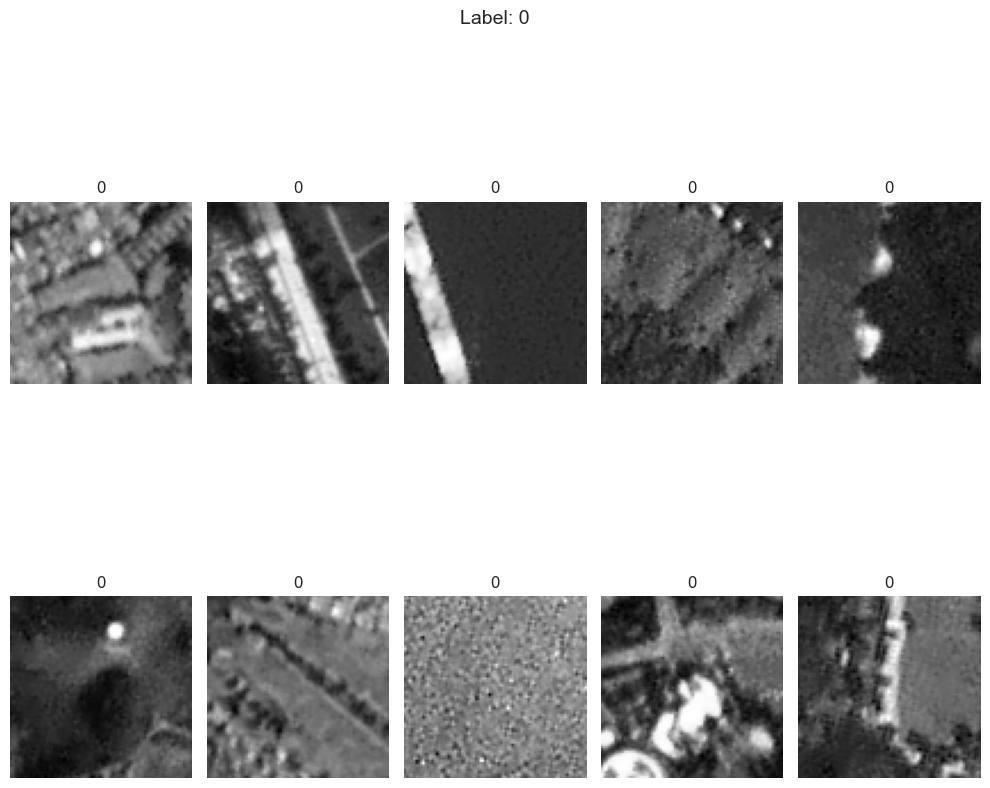

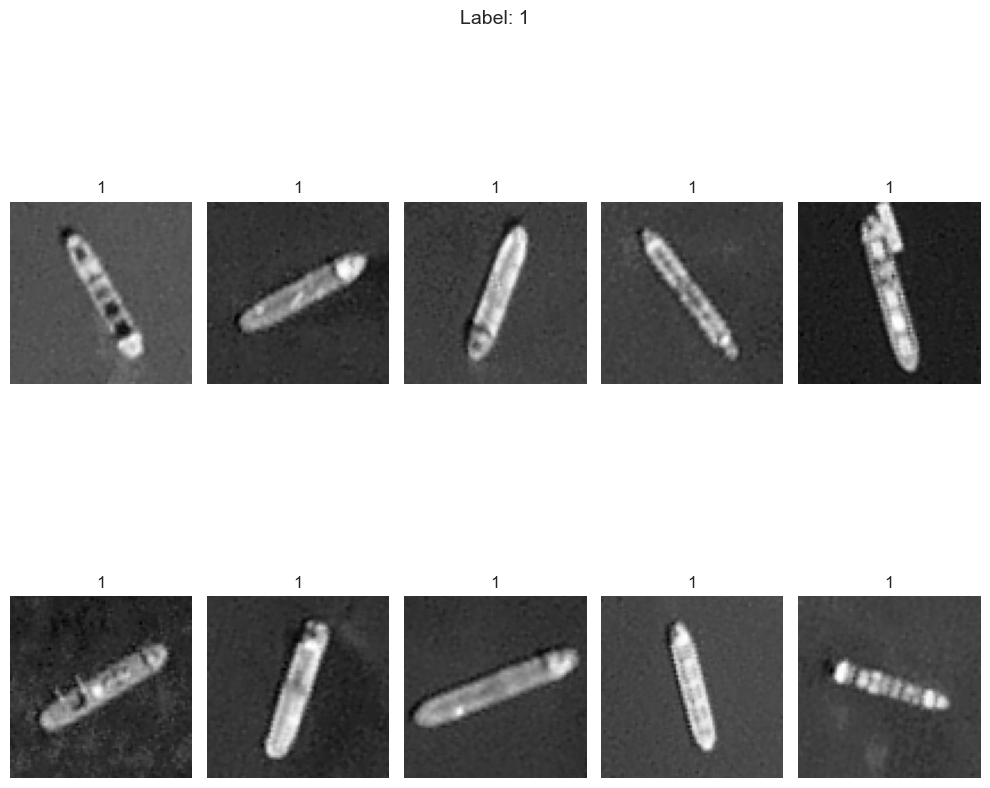

In [9]:
# Inspect some data (images)
num_each_label = 10

for lab in np.unique(labels):
    # Fetch images with different labels
    X_lab, y_lab = data_bw[ labels == lab ], labels[ labels == lab]
    # Display images
    fig = helper.showData( X_lab[:num_each_label], [ str(label) for label in y_lab[:num_each_label] ], cmap="gray")
    _= fig.suptitle("Label: "+  str(lab), fontsize=14)
    _= fig.show()
    print("\n\n")


It appears that a photo is labeled as having a ship present only if the ship is in the **center** of the photo. 

Perhaps this prevents us from double-counting.

In any event: we have learned something about the examples that may help us in building models
- Perhaps there is some feature engineering that we can perform to better enable classification

## Create a test set

To train and evaluate a model, we need to split the original dataset into
a training subset (in-sample) and a test subset (out of sample).

**Question:**

Split the data
- Set X_train, X_test, y_train and y_tests to match the description in the comment
- 90% will be used for training the model
- 10% will be used as validation (out of sample) examples

**Hint:**
- Use `train_test_split()` from `sklearn` to perform this split
    -  Set the `random_state` parameter of `train_test_split()` to be 42

We will help you by
- Assigning the feature vectors to X and the labels to y
- Flattening the two dimensional spatial dimensions of the features to a single dimension

In [10]:
from sklearn.model_selection import train_test_split

y = labels
X = data_bw

X_train = None
X_test = None
y_train = None
y_test = None

### Flatten X
X = X.reshape(X.shape[0], -1)

# Split data into train and test
# Create variables X_train, X_test, y_train, y_test
#   X_train: training examples
#   y_train: labels of the training examples
#   X_test:  test examples
#   y_test:  labels of test examples
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
# YOUR CODE HERE
#raise NotImplementedError()

print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (3600, 6400)
X_test shape:  (400, 6400)
y_train shape:  (3600,)
y_test shape:  (400,)


Your expected outputs should be following        
`X_train shape:  (3600, 6400)`      
`X_test shape:  (400, 6400)`      
`y_train shape:  (3600,)`       
`y_test shape:  (400,)`      


# Prepare the data and Classifier

**Questions:**

You will transform the data and create a Classifier.

The requirements are as follows:

- Transform the features (i.e., the pixel grids) into standardized values (mean 0, unit standard deviation)
    - Set a variable `scaler` to be your scaler
- Create an `sklearn` Classifier
    - Set variable `clf` to be be your Classifier object
    - We recommend trying Logistic Regression first
        - `sklearn`'s implementation of Logistic Regression has many parameter choices
        - We recommend starting with the single parameter `solver="liblinear"`
        - You may want to use the `sklearn` manual to learn about the other parameters

**Hints:**

- Look up `StandardScaler` in `sklearn`; this is a transformation to create standardized values
- You will use transformed examples both for training and test examples
    - So be sure that you can perform the transformation on both sets of examples
- Using `Pipeline` in `sklearn`, whose last element is a model, is a very convenient way to
    - Implement transformations and perform model fitting/prediction
    - In a way that ensures that all examples, both training and test, are treated consistently
    - Enables Cross Validation without cheating


In [11]:
import time
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler

from sklearn.pipeline import Pipeline


## Data Scaler
#  Create a StandardScaler object
#    scaler: sklearn standard scaler
#scaler = None
scaler = StandardScaler()
# YOUR CODE HERE
#raise NotImplementedError()


## Classification Model
#  Create a classifier
#    clf: sklearn classifier
#    name: string, name of your classifier
#    model_pipeline: sklearn Pipeline, if you use pipeline, please use this variable
#clf = None
#name = None
clf = LogisticRegression(solver="liblinear")
name = "Logistic Regression with Standard Scaler"
model_pipeline = Pipeline([
    ('scaler', scaler),  
    ('classifier', clf) 
])
# YOUR CODE HERE
#raise NotImplementedError()

## Train model

**Question:**
- Use your Classifier or model pipeline to train your dataset and compute the in-sample accuracy
    - Set a variable `score_in_sample` to store the in-sample accuracy 

**Hint:**
- The `sklearn` function `accuracy_score` may be helpful


In [12]:
from sklearn.metrics import accuracy_score
# Set variable
# score_in_sample: a scalar number, score for your in-sample examples
#score_in_sample = None

# YOUR CODE HERE
from sklearn.metrics import accuracy_score
model_pipeline.fit(X_train, y_train)
y_train_pred = model_pipeline.predict(X_train)
score_in_sample = accuracy_score(y_train, y_train_pred)
#raise NotImplementedError()

print("Model: {m:s} in sample score={s:3.2f}\n".format(m=name, s=score_in_sample))

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier', LogisticRegression(solver='liblinear'))])

Model: Logistic Regression with Standard Scaler in sample score=1.00


## Train the model using Cross Validation

Since we only have one test set, we want to use 5-fold cross validation check model performance.

**Question:**
- Use 5-fold Cross Validation
    - Set `cross_val_scores` as your scores of k-fold results
    - Set `k` as the number of folds
    - Report the average score


**Hint:**
- `cross_val_score` in `sklearn` will be useful


In [13]:
# Set variable 
#  scores: an array of scores (length 5), one for each fold that is out-of-sample during cross-validation
#  k: number of folds
cross_val_scores = None
k = 5

t0 = time.time()
# YOUR CODE HERE
from sklearn.model_selection import cross_val_score
cross_val_scores = cross_val_score(model_pipeline, X_train, y_train, cv=k)
#raise NotImplementedError()

print("Model: {m:s} avg cross validation score={s:3.2f}\n".format(m=name, s=cross_val_scores.mean()) )
print("Cross validation time: ", time.time()-t0)

Model: Logistic Regression with Standard Scaler avg cross validation score=0.87

Cross validation time:  58.82390093803406


# How many parameters in the model ?

**Question:** 

- Calculate the number of parameters in your model. Report only the number of *non-intercept* parameters. 
   - Set `num_parameters` to store the number of parameters

**Hint:** 

- The model object may have a method to help you ! Remember that Jupyter can help you find the methods that an object implements.


In [14]:
# Set num_parameters equal to the number of non-intercept parameters in the model
num_parameters = None

# YOUR CODE HERE
num_parameters = len(clf.coef_[0])
#raise NotImplementedError()

print("\nShape of intercept: {i}; shape of coefficients: {c}".format(i=clf.intercept_.shape,
                                                                   c=num_parameters) )


Shape of intercept: (1,); shape of coefficients: 6400


The above part calculates the number of parameters in the model as the markdown part requests. If we want to konow the shape of the coefficients, we can use the code below to get the shape of the coefficients.

In [15]:
clf.coef_.shape

(1, 6400)

# Evaluate the model

**Question:**

We have trained our model. We now need to  evaluate the model using the test dataset created in an earlier cell.

Please store the model accuracy on the test set in a variable named `score_out_of_sample`.   

**Hint:**
- If you have transformed examples for training, you must perform the same transformation for test examples !

- Remember: you *fit* the transformations only on the training examples, not on the test examples !

In [16]:
# Set variable to store the model accuracy on the test set
score_out_of_sample = None

# YOUR CODE HERE
y_test_pred = model_pipeline.predict(X_test)
score_out_of_sample = accuracy_score(y_test, y_test_pred)
#raise NotImplementedError()

print("Model: {m:s} out-of-sample score={s:3.2f}\n".format(m=name, s=score_out_of_sample))

Model: Logistic Regression with Standard Scaler out-of-sample score=0.85


# Visualize the parameters

Remember: there is a one-to-one association between parameters and input features (pixels).

So we can arrange the parameters into the same two dimensional grid structure as images.

This might tell us what "pattern" of features the model is trying to match.

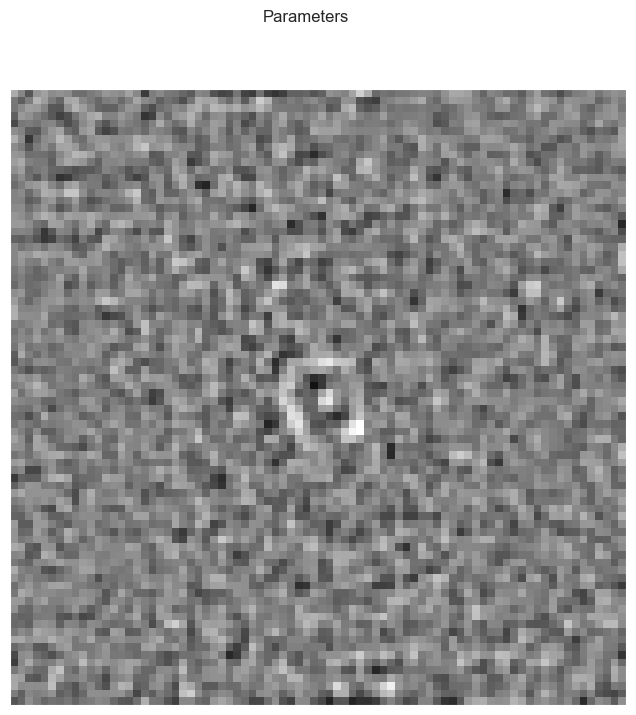

In [17]:
helper.model_interpretation(clf)

# Further Exploration (Optional)
Now you can build your own model using what you have learned from the course. Some ideas to try:
- Was it a good idea to drop the "color" dimension by converting the 3 color channels to a single one ?
- Can you interpret the coefficients of the model ?  Is there a discernible "pattern" being matched ?
- Feature engineering !
    - Come up with some ideas for features that may be predictive, e.g, patterns of pixels
    - Test them
- Use Error Analysis to guide your feature engineering
- Add a *regularization penalty* to your loss function
    - How does this affect
        - The in-sample fit ?
        - The visualization of the parameters
    - **Hint**: The `sklearn` `LogisticRegression` model
        - has several choices for the `penalty` parameter
        - has a variable value for the regularization strength parameter `C`

Observe the effect of each change on the Loss and Accuracy.


First, we try the idea "Was it a good idea to drop the "color" dimension by converting the 3 color channels to a single one ?"


Step 1 Data Preparation:
First, we need to use the original dataset, which consists of RGB images with three color channels. We will use the original dataset to train the model and evaluate the model performance.

In [18]:
y = labels
X_rgb = data

X_train_rgb = None
X_test_rgb = None
y_train = None
y_test = None

### Flatten X
X_rgb = X_rgb.reshape(X.shape[0], -1)

# Split data into train and test
# Create variables X_train, X_test, y_train, y_test
#   X_train: training examples
#   y_train: labels of the training examples
#   X_test:  test examples
#   y_test:  labels of test examples
X_train_rgb, X_test_rgb, y_train, y_test = train_test_split(X_rgb, y, test_size=0.1, random_state=42)
# YOUR CODE HERE
#raise NotImplementedError()

print("X_train_rgb shape: ", X_train_rgb.shape)
print("X_test_rgb shape: ", X_test_rgb.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)

X_train_rgb shape:  (3600, 19200)
X_test_rgb shape:  (400, 19200)
y_train shape:  (3600,)
y_test shape:  (400,)


Step 2 Train the Model on RGB Data and Evaluate In-Sample Accuracy
In this step, we train the machine learning model using the RGB image data (`X_train_rgb`) and the corresponding training labels (`y_train`). We then evaluate the in-sample accuracy of the model.

In [19]:
model_pipeline.fit(X_train_rgb, y_train)
y_train_pred_rgb = model_pipeline.predict(X_train_rgb)
score_in_sample = accuracy_score(y_train, y_train_pred_rgb)

print("Model: {m:s} in sample score={s:3.2f}\n".format(m=name, s=score_in_sample))

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier', LogisticRegression(solver='liblinear'))])

Model: Logistic Regression with Standard Scaler in sample score=1.00


Step 3 Train the Model on RGB Data and Evaluate Cross Validation Score
In this step, we perform 5-fold cross-validation on the training data and evaluate the average model performance. 

In [20]:
cross_val_scores = None
k = 5

t0 = time.time()

cross_val_scores_rgb = cross_val_score(model_pipeline, X_train_rgb, y_train, cv=k)


print("Model: {m:s} avg cross validation score={s:3.2f}\n".format(m=name, s=cross_val_scores_rgb.mean()) )
print("Cross validation time: ", time.time()-t0)

Model: Logistic Regression with Standard Scaler avg cross validation score=0.91

Cross validation time:  212.00536394119263


Step 4 Calculate the Number of Parameters in the Model
In this step, we calculate and display the number of parameters in the trained logistic regression model (`clf`). Specifically, we look at two important aspects:
1. Intercept (`clf.intercept_`)
2. Coefficients (`clf.coef_`)

In [21]:
num_parameters_rgb = len(clf.coef_[0])
print("\nShape of intercept: {i}; shape of coefficients: {c}".format(i=clf.intercept_.shape,
                                                                   c=num_parameters_rgb) )


Shape of intercept: (1,); shape of coefficients: 19200


Step 5 Evaluate the Model on RGB Data
In this step, we evaluate the model's performance on the test set. 

In [22]:
y_test_pred_rgb = model_pipeline.predict(X_test_rgb)
score_out_of_sample_rgb = accuracy_score(y_test, y_test_pred_rgb)
#raise NotImplementedError()

print("Model: {m:s} out-of-sample score={s:3.2f}\n".format(m=name, s=score_out_of_sample_rgb))

Model: Logistic Regression with Standard Scaler out-of-sample score=0.90


Comparison(change on the Loss and Accuracy) & Summary:
- In-sample accuracy: 1 (grayscale) vs 1 (RGB)
  Both the grayscale and RGB models achieve perfect in-sample accuracy (1.0), indicating that both models fit the training data well. However, this does not necessarily reflect their ability to generalize to new data.
  
- Cross-validation score: 0.87 (grayscale) vs 0.91 (RGB)
    The RGB model achieves a higher cross-validation score (0.91) compared to the grayscale model (0.87). This suggests that the RGB model generalizes better to new data compared to the grayscale model.
  
- Cross validation time:  59s (grayscale) vs 212s (RGB)
    The RGB model takes longer to perform cross-validation compared to the grayscale model. This is expected since the RGB model has more parameters (19200) compared to the grayscale model (6400).
  
- Number of parameters: 6400 (grayscale) vs 19200 (RGB)
    The RGB model has more parameters (19200) compared to the grayscale model (6400) due to the additional color channels in the RGB images. This increases the complexity of the model and the time required for training and evaluation.
  
- Out-of-sample accuracy: 0.85 (grayscale) vs 0.90 (RGB)
    The RGB model achieves a higher out-of-sample accuracy (0.91) compared to the grayscale model (0.85). This indicates that the RGB model performs better on new data compared to the grayscale model.

In summary, the RGB model outperforms the grayscale model in terms of cross-validation score and out-of-sample accuracy. This suggests that the additional color channels in the RGB images provide more information that helps the model generalize better to new data. However, the RGB model is more complex and takes longer to train and evaluate compared to the grayscale model. Therefore, the choice between grayscale and RGB models depends on the trade-off between model performance and computational resources.


Next, we try the idea "Can you interpret the coefficients of the model ? Is there a discernible "pattern" being matched ?"  we aim to interpret the coefficients of the model and see if there is any discernible pattern being matched. 

Step 1:  We visualize the coefficients for each channel (Red, Green, and Blue).

Text(0.5, 1.0, 'Red Channel')

[]

[]

Text(0.5, 1.0, 'Green Channel')

[]

[]

Text(0.5, 1.0, 'Blue Channel')

[]

[]

Text(0.5, 0.98, 'Parameters by RGB Channels')

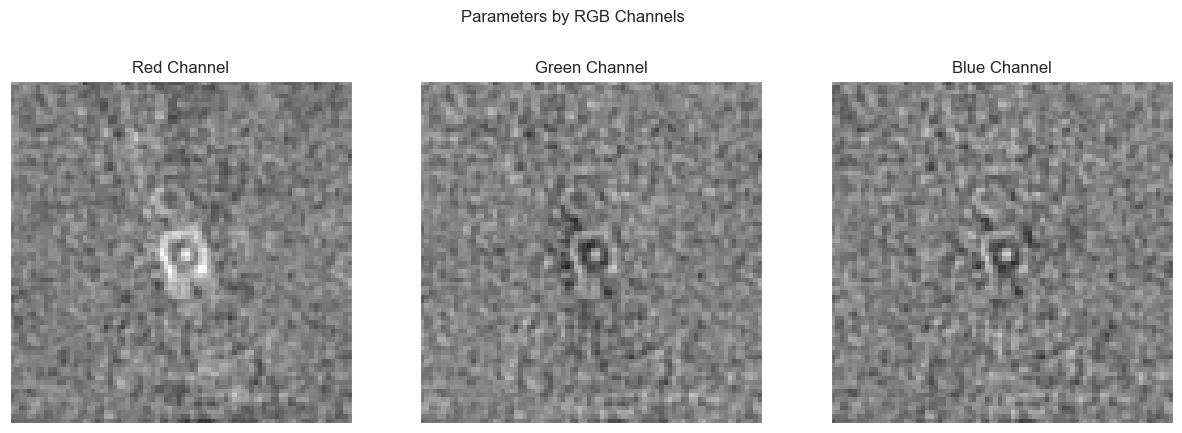

In [23]:
num_features = clf.coef_[0].shape[-1]

dim = int(np.sqrt(num_features / 3))  
reshaped_coef = clf.coef_[0].reshape(dim, dim, 3)

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
channels = ['Red', 'Green', 'Blue']
scale = np.abs(clf.coef_[0]).max() 

for i, ax in enumerate(axes):
    ax.imshow(reshaped_coef[:, :, i], cmap="gray", interpolation='nearest', vmin=-scale, vmax=scale)
    ax.set_title(f"{channels[i]} Channel")
    ax.set_xticks(())
    ax.set_yticks(())

fig.suptitle('Parameters by RGB Channels')
plt.show()

Answer to the question: "Can you interpret the coefficients of the model ? Is there a discernible "pattern" being matched ?" 
1.
Can you interpret the coefficients of the model？

The coefficients of the model represent the importance of each pixel in the image for predicting the presence of a ship. Positive coefficients indicate that a higher pixel value increases the likelihood of a ship being present, while negative coefficients indicate the opposite. 

2.
Is there a discernible "pattern" being matched？

In the grayscale version, we see a clear circular feature, suggesting that the model is detecting some localized, significant feature in the image. This is corroborated by the RGB breakdown, where all three channels (Red, Green, and Blue) show a similar pattern, though with slight differences in intensity or detail across channels.

Next, we try the idea "Feature engineering ! Come up with some ideas for features that may be predictive, e.g, patterns of pixels Test them"

Step 1: Generate Edge Features
In this step, we generate edge features using the Canny edge detection algorithm. The edge features capture the edges in the images, which can be useful for ship detection.
In this part, we need to import cv2, which needs to installed python package opencv-python. If you can't install the package, please ignore this part

In [24]:
import numpy as np
try:
    import cv2
    def generate_edge_features(X):
        edge_features = []
        
        for gray_img in X: 
            if gray_img.dtype != np.uint8:
                gray_img = (gray_img * 255).astype(np.uint8)
            edges = cv2.Canny(gray_img, threshold1=100, threshold2=200)
            edge_features.append(edges)
        return np.array(edge_features)
    
except:   
    print("please ignore this part if you can't install the package opencv-python")

Step 2：Crop Center and Concatenate Features
In this step, we first use the generate_edge_features function to extract the edge features of the images, focusing only on the red channel (data[:, :, :, 0] represents extracting the red channel) because there is a distinct pattern shown in figure of red channel. 

Next, we apply the crop_center function to crop the center of these images, creating a 20x20 central region for each image to be more focused the pattern in the red channel figure. 

In [25]:
try:
    def crop_center(image, cropx, cropy):
        y, x = image.shape[:2]
        startx = x//2 - (cropx//2)
        starty = y//2 - (cropy//2)
        return image[starty:starty+cropy, startx:startx+cropx]

except:
    print("please ignore this part if you can't install the package opencv-python")


In [26]:
try:
    X_edges = generate_edge_features(data[:, :, :, 0])
    X_edges = X_edges.reshape(-1, 80, 80)
    cropped_images = np.array([crop_center(img, 20, 20) for img in X_edges])
    X_edges = cropped_images.reshape(cropped_images.shape[0], -1)
    X_edges = np.concatenate([X, X_edges], axis=1)

except:
    print("please ignore this part if you can't install the package opencv-python")

Step 3: Train the Model with Edge Features
In this step, we train the model using the edge features and evaluate the model performance on the training and test sets. 

In [27]:
try:
    X_train_edges, X_test_edges, y_train, y_test = train_test_split(X_edges, y, test_size=0.1, random_state=42)
    model_pipeline.fit(X_train_edges, y_train)
    y_train_pred_edges = model_pipeline.predict(X_train_edges)
    score_in_sample_edges = accuracy_score(y_train, y_train_pred_edges)
    print("Model: {m:s} in sample score={s:3.2f}\n".format(m=name, s=score_in_sample_edges))
except:
    print("please ignore this part if you can't install the package opencv-python")

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier', LogisticRegression(solver='liblinear'))])

Model: Logistic Regression with Standard Scaler in sample score=1.00


In [28]:
try:  
    cross_val_scores = None
    k = 5
    
    t0 = time.time()
    
    cross_val_scores_edges = cross_val_score(model_pipeline, X_train_edges, y_train, cv=k)
    
    
    print("Model: {m:s} avg cross validation score={s:3.2f}\n".format(m=name, s=cross_val_scores_edges.mean()) )
    print("Cross validation time: ", time.time()-t0)
except:
    print("please ignore this part if you can't install the package opencv-python")

Model: Logistic Regression with Standard Scaler avg cross validation score=0.90

Cross validation time:  38.76154184341431


In [29]:
try:
    y_test_pred_edges = model_pipeline.predict(X_test_edges)
    score_out_of_sample_edges = accuracy_score(y_test, y_test_pred_edges)
    print("Model: {m:s} out-of-sample score={s:3.2f}\n".format(m=name, s=score_out_of_sample_edges))
except:
    print("please ignore this part if you can't install the package opencv-python")

Model: Logistic Regression with Standard Scaler out-of-sample score=0.88


Comparison(change on the Loss and Accuracy) & Summary:
- In-sample accuracy: 1 (grayscale)  vs 1 (Edge Features)
  Both models achieve perfect in-sample accuracy (1.0), indicating that they fit the training data well. However, this does not necessarily reflect their ability to generalize to new data.
- Cross-validation score: 0.87 (grayscale) vs 0.90 (Edge Features)
 The Edge Features model achieves a higher cross-validation score (0.90) compared to the grayscale model (0.87). This suggests that the Edge Features model generalizes better to new data compared to the grayscale model.
- Out-of-sample accuracy: 0.85 (grayscale) vs 0.88 (Edge Features)
    The Edge Features model achieves a higher out-of-sample accuracy (0.88) compared to the grayscale model (0.85). This indicates that the Edge Features model performs better on new data compared to the grayscale model.

Summary: The Edge Features model outperforms the grayscale model in terms of cross-validation score and out-of-sample accuracy. This suggests that the additional edge features provide more information that helps the model generalize better to new data. 


Next, we try the part "Use Error Analysis to guide your feature engineering"


Error Analysis: we calculate the confusion matrix and various metrics to analyze the model's errors.

<Figure size 800x600 with 0 Axes>

<Axes: >

Text(70.72222222222221, 0.5, 'Actual')

Text(0.5, 36.72222222222221, 'Predicted')

Text(0.5, 1.0, 'Confusion Matrix')

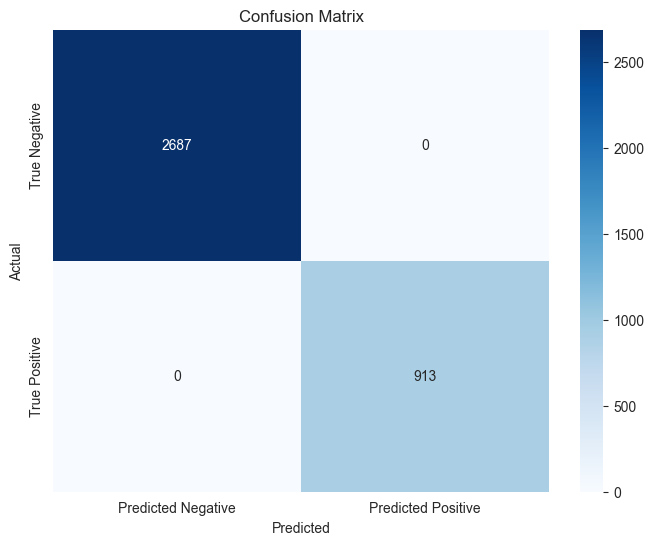

Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1-Score: 1.00


In [30]:

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_train, y_train_pred_edges)

accuracy = accuracy_score(y_train, y_train_pred_edges)
precision = precision_score(y_train, y_train_pred_edges)
recall = recall_score(y_train, y_train_pred_edges)
f1 = f1_score(y_train, y_train_pred_edges)

cm = confusion_matrix(y_train, y_train_pred_edges)

labels = ['Positive', 'Negative']

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['True Negative', 'True Positive'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

The confusion matrix and performance metrics indicate that clf model has achieved perfect performance on train set.

<Figure size 800x600 with 0 Axes>

<Axes: >

Text(70.72222222222221, 0.5, 'Actual')

Text(0.5, 36.72222222222221, 'Predicted')

Text(0.5, 1.0, 'Confusion Matrix')

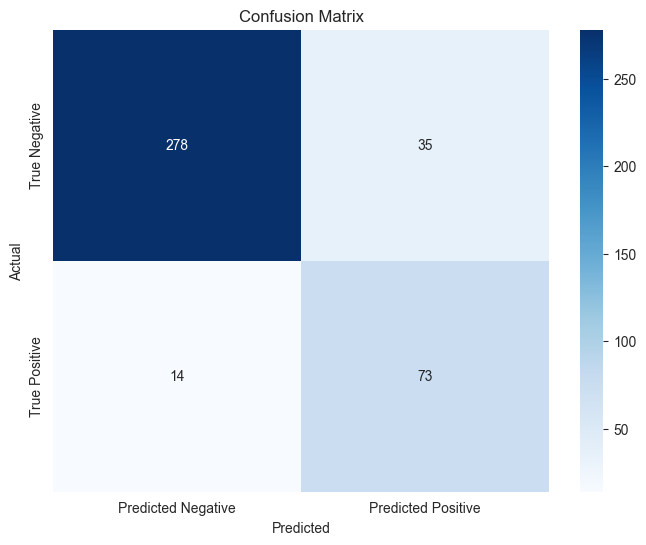

Accuracy: 0.88
Precision: 0.68
Recall: 0.84
F1-Score: 0.75


In [31]:
conf_matrix = confusion_matrix(y_test, y_test_pred_edges)

accuracy = accuracy_score(y_test, y_test_pred_edges)
precision = precision_score(y_test, y_test_pred_edges)
recall = recall_score(y_test, y_test_pred_edges)
f1 = f1_score(y_test, y_test_pred_edges)

cm = confusion_matrix(y_test, y_test_pred_edges)

labels = ['Positive', 'Negative']

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['True Negative', 'True Positive'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

Interpretation of Confusion Matrix:
True Negative (TN): 278 negative examples were correctly classified as negative.
False Positive (FP): 35 negative examples were incorrectly classified as positive.
False Negative (FN): 14 positive examples were incorrectly classified as negative.
True Positive (TP): 73 positive examples were correctly classified as positive.
Model Metrics:
Accuracy: 0.88
The model correctly classified 88% of the total examples, showing a good overall performance.
Precision: 0.68
Out of the examples predicted as positive, 68% were actually positive. The lower precision indicates the model made several errors with 35 false positives, meaning some negative cases were predicted as positive.
Recall: 0.84
The model correctly identified 84% of the actual positive examples, meaning it missed only 14 positive cases, suggesting decent performance in capturing positive cases.
F1-Score: 0.75
The F1 score is the harmonic mean of precision and recall, showing a balance between the two. A score of 0.75 reflects a moderate overall performance, but there is room for improvement.
Error Analysis:
False Positives (FP): The model incorrectly predicted 35 negative samples as positive. This lowers the model's precision, suggesting that some negative examples share similar features with positive ones.
False Negatives (FN): 14 positive samples were misclassified as negative. While the number is small, it still affects recall, as some true positives were missed.

Next, we try the part "Add a regularization penalty to your loss function"

This section of code demonstrates how to train and evaluate a Logistic Regression model using both L1 and L2 regularization (penalties), with different regularization strengths (`C_values`). The performance of the model is evaluated on the training set (in-sample score), using cross-validation, and on the test set (out-of-sample score).

In [37]:
C_values = [0.1,0.5, 1,5, 10, 50]
penalties=['l1','l2']

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier',
                 LogisticRegression(C=0.1, penalty='l1', solver='liblinear'))])

C= 0.1 penalty= l1
Model: Logistic Regression with Standard Scaler in sample score=0.92

Model: Logistic Regression with Standard Scaler avg cross validation score=0.90

Model: Logistic Regression with Standard Scaler out-of-sample score=0.90


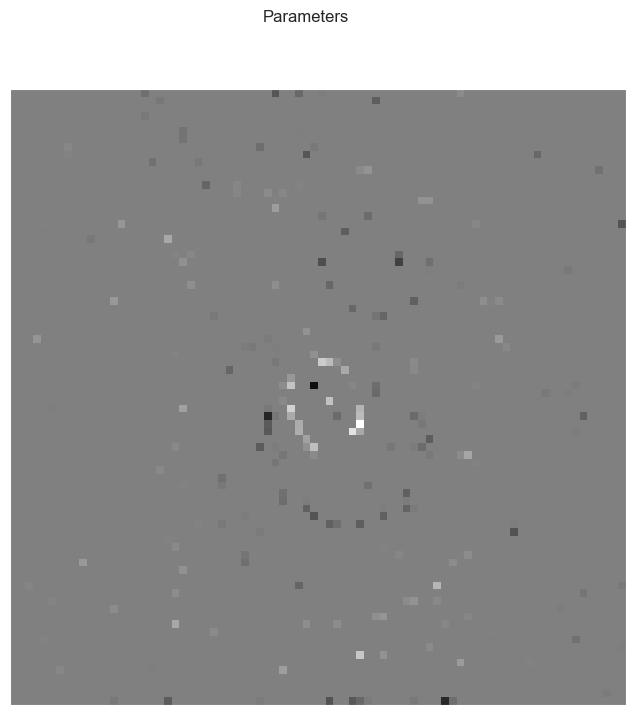

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier', LogisticRegression(C=0.1, solver='liblinear'))])

C= 0.1 penalty= l2
Model: Logistic Regression with Standard Scaler in sample score=1.00

Model: Logistic Regression with Standard Scaler avg cross validation score=0.88

Model: Logistic Regression with Standard Scaler out-of-sample score=0.86


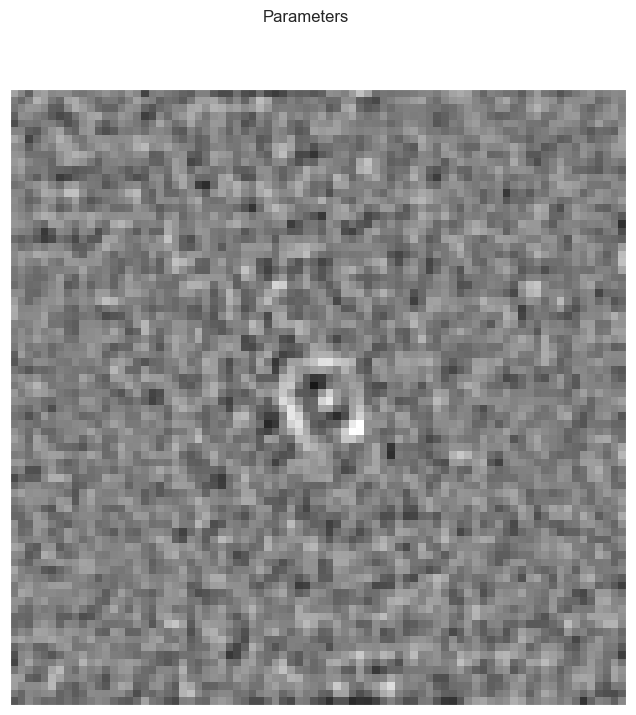

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier',
                 LogisticRegression(C=0.5, penalty='l1', solver='liblinear'))])

C= 0.5 penalty= l1
Model: Logistic Regression with Standard Scaler in sample score=0.99

Model: Logistic Regression with Standard Scaler avg cross validation score=0.89

Model: Logistic Regression with Standard Scaler out-of-sample score=0.87


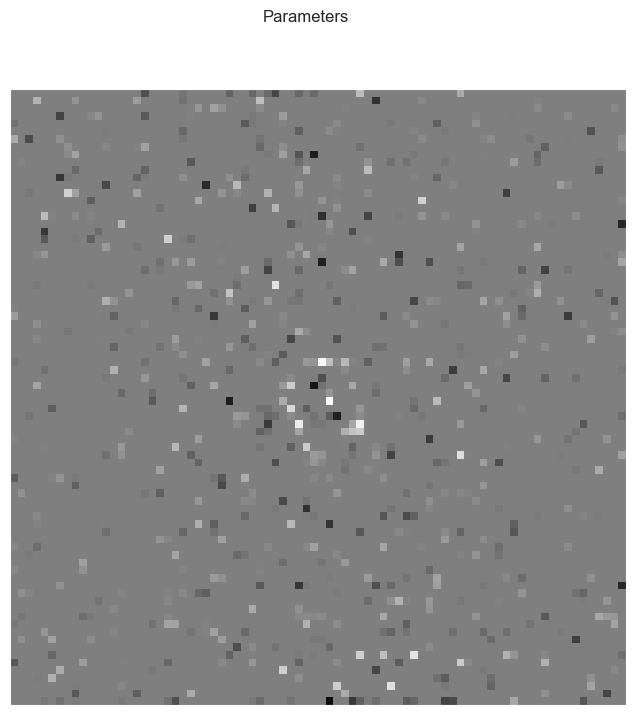

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier', LogisticRegression(C=0.5, solver='liblinear'))])

C= 0.5 penalty= l2
Model: Logistic Regression with Standard Scaler in sample score=1.00

Model: Logistic Regression with Standard Scaler avg cross validation score=0.87

Model: Logistic Regression with Standard Scaler out-of-sample score=0.85


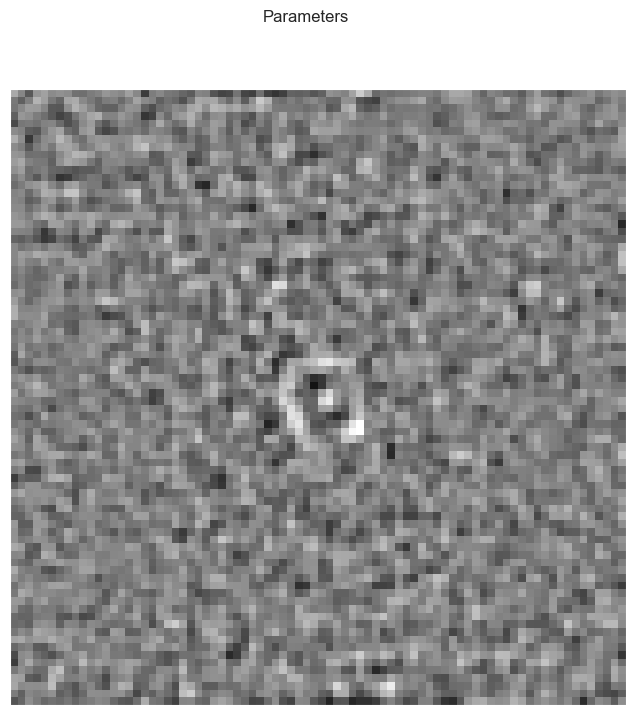

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier',
                 LogisticRegression(C=1, penalty='l1', solver='liblinear'))])

C= 1 penalty= l1
Model: Logistic Regression with Standard Scaler in sample score=1.00

Model: Logistic Regression with Standard Scaler avg cross validation score=0.88

Model: Logistic Regression with Standard Scaler out-of-sample score=0.86


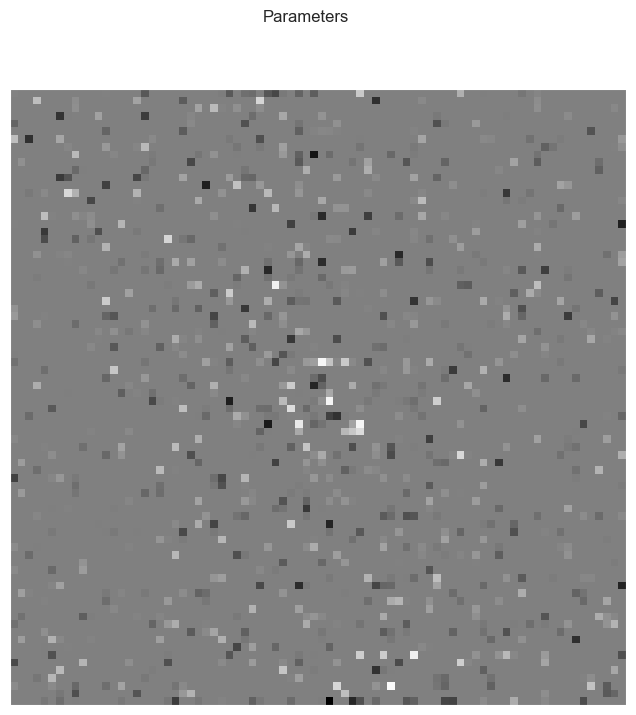

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier', LogisticRegression(C=1, solver='liblinear'))])

C= 1 penalty= l2
Model: Logistic Regression with Standard Scaler in sample score=1.00

Model: Logistic Regression with Standard Scaler avg cross validation score=0.87

Model: Logistic Regression with Standard Scaler out-of-sample score=0.85


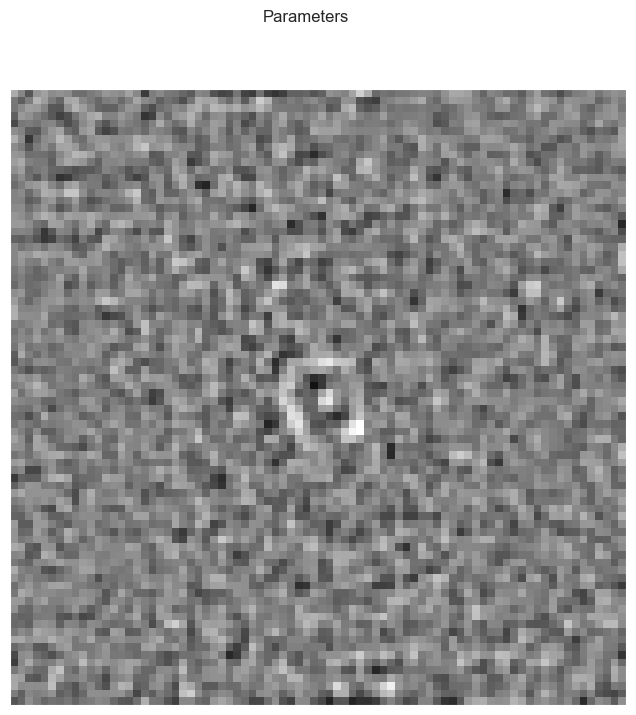

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier',
                 LogisticRegression(C=5, penalty='l1', solver='liblinear'))])

C= 5 penalty= l1
Model: Logistic Regression with Standard Scaler in sample score=1.00

Model: Logistic Regression with Standard Scaler avg cross validation score=0.87

Model: Logistic Regression with Standard Scaler out-of-sample score=0.85


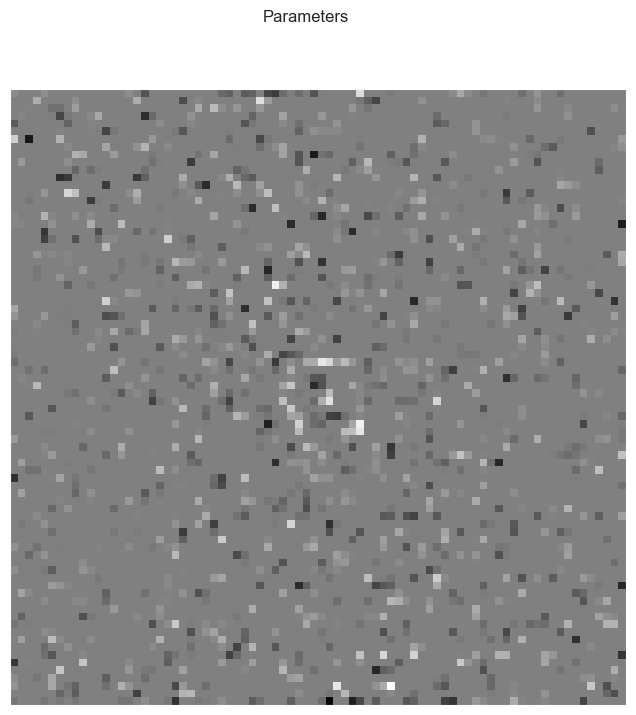

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier', LogisticRegression(C=5, solver='liblinear'))])

C= 5 penalty= l2
Model: Logistic Regression with Standard Scaler in sample score=1.00

Model: Logistic Regression with Standard Scaler avg cross validation score=0.86

Model: Logistic Regression with Standard Scaler out-of-sample score=0.84


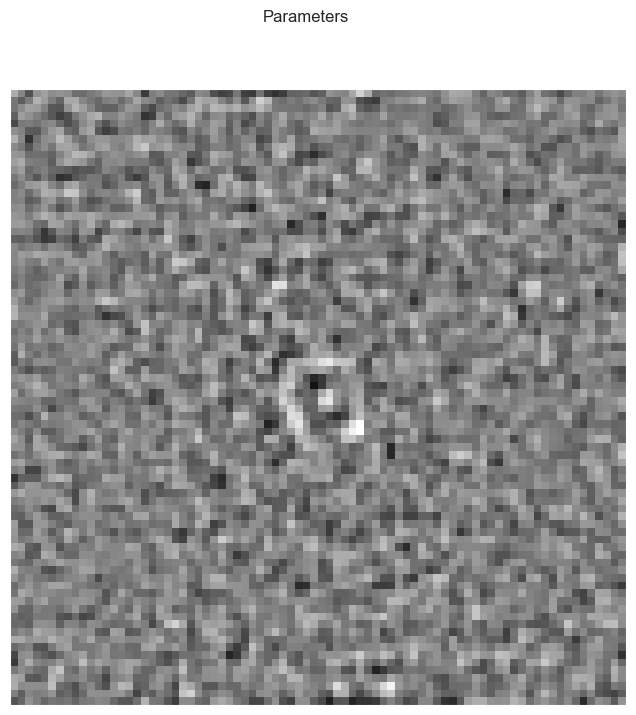

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier',
                 LogisticRegression(C=10, penalty='l1', solver='liblinear'))])

C= 10 penalty= l1
Model: Logistic Regression with Standard Scaler in sample score=1.00

Model: Logistic Regression with Standard Scaler avg cross validation score=0.87

Model: Logistic Regression with Standard Scaler out-of-sample score=0.85


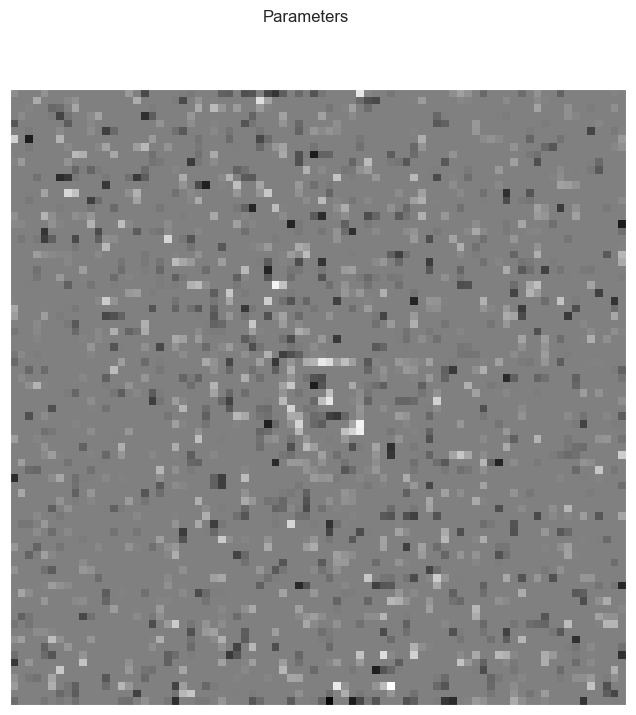

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier', LogisticRegression(C=10, solver='liblinear'))])

C= 10 penalty= l2
Model: Logistic Regression with Standard Scaler in sample score=1.00

Model: Logistic Regression with Standard Scaler avg cross validation score=0.86

Model: Logistic Regression with Standard Scaler out-of-sample score=0.84


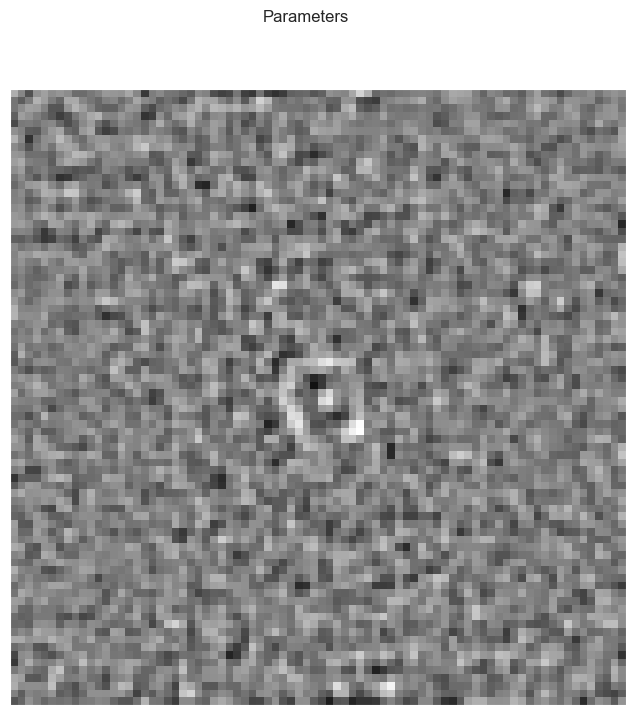

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier',
                 LogisticRegression(C=50, penalty='l1', solver='liblinear'))])

C= 50 penalty= l1
Model: Logistic Regression with Standard Scaler in sample score=1.00

Model: Logistic Regression with Standard Scaler avg cross validation score=0.86

Model: Logistic Regression with Standard Scaler out-of-sample score=0.84


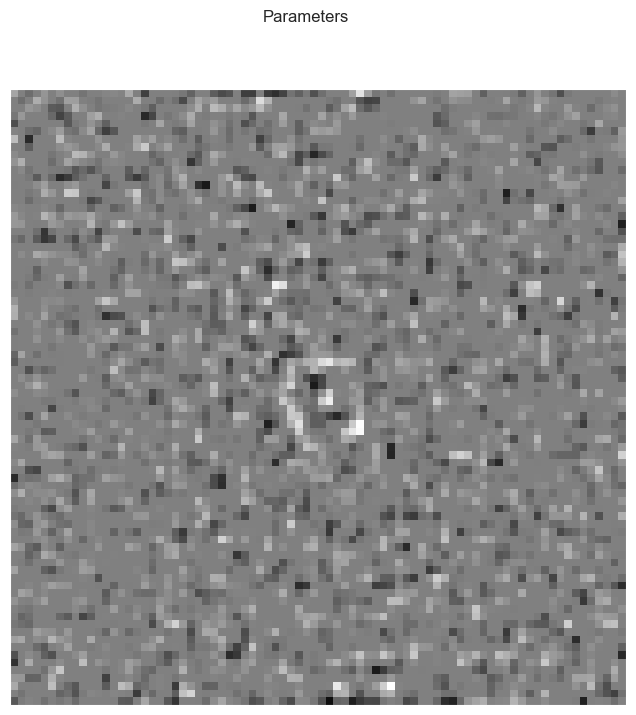

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier', LogisticRegression(C=50, solver='liblinear'))])

C= 50 penalty= l2
Model: Logistic Regression with Standard Scaler in sample score=1.00

Model: Logistic Regression with Standard Scaler avg cross validation score=0.86

Model: Logistic Regression with Standard Scaler out-of-sample score=0.84


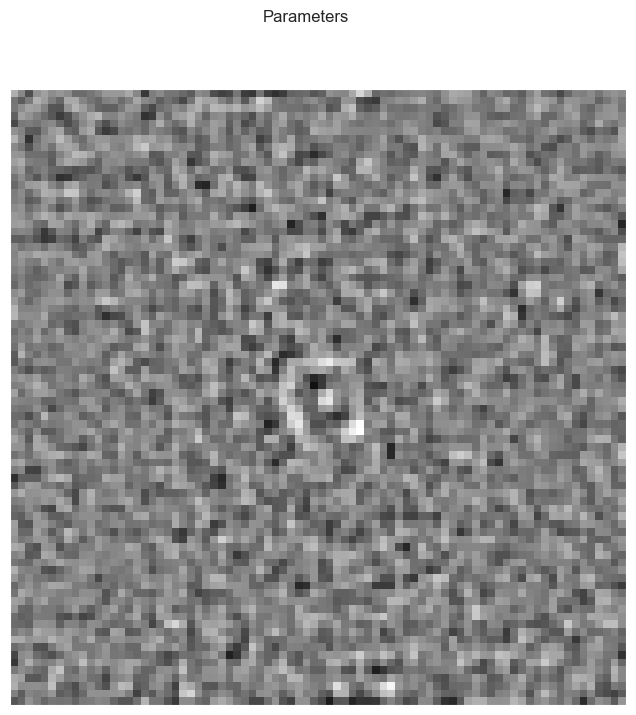

In [38]:
for C in C_values:
    for penalty in penalties:
    
        clf = LogisticRegression(penalty=penalty, C=C, solver='liblinear')
        
        name = "Logistic Regression with Standard Scaler"
        model_pipeline = Pipeline([
        ('scaler', scaler),  
        ('classifier', clf) 
        ])
        model_pipeline.fit(X_train, y_train)
        y_train_pred = model_pipeline.predict(X_train)
        score_in_sample = accuracy_score(y_train, y_train_pred)
        cross_val_scores = cross_val_score(model_pipeline, X_train, y_train, cv=k)
        y_test_pred = model_pipeline.predict(X_test)
        score_out_of_sample = accuracy_score(y_test, y_test_pred)
        
        print("C=",C,"penalty=",penalty)
        print("Model: {m:s} in sample score={s:3.2f}\n".format(m=name, s=score_in_sample))
        print("Model: {m:s} avg cross validation score={s:3.2f}\n".format(m=name, s=cross_val_scores.mean()))
        print("Model: {m:s} out-of-sample score={s:3.2f}\n".format(m=name, s=score_out_of_sample))
        helper.model_interpretation(clf)
        plt.show()
    


Comparison between different C values and penalties:
The performance of the model varies with different regularization strengths (C values) and penalties (L1 and L2). Here are some observations:
In general, l1 regularization tends to produce sparser models with more zero coefficients compared to l2 regularization. In the result, the score of l1 regularization is slightly higher than l2 regularization.
For the C values, a higher C value (less regularization) results in a higher in-sample score but may lead to overfitting. Conversely, a lower C value (more regularization) may improve generalization but could underfit the data. In the result, when C=0.1 & C=0.5, the model has the best performance.
